In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

!pip install some_package_name

In [ ]:
x = tf.ones(shape = (2,1))
print(x)

x = tf.zeros(shape = (2,1))
print(x)

x = tf.random.normal(shape = (3,1), mean = 0., stddev = 1.)
print(x)

x = tf.random.uniform(shape = (3,1), minval = 0., maxval = 1.)
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[-0.05256885]
 [ 0.5413872 ]
 [ 1.6585292 ]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.24142098]
 [0.65376306]
 [0.48387873]], shape=(3, 1), dtype=float32)


Unlike NumPy arrays, TensorFlow tensors are constant where NumPy Arrays are variables. So you can only assign specific elements like seen below in NumPy, not TensorFlow.

In [ ]:
x = np.ones(shape= (2,2))
x[0,0] = 0

x = tf.ones(shape = (2,2))
x[0,0] = 0

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [ ]:
v = tf.Variable(initial_value = tf.random.normal(shape=(3,1)))
print(v)

v.assign(tf.ones((3,1)))

v[0,0].assign(3.)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.17942558],
       [ 0.7796179 ],
       [-0.28238878]], dtype=float32)>


<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

assign_add() and assign_sub() are effcient equivalents of += and -=.

In [ ]:
v.assign_add(tf.ones((3,1)))

a = tf.ones((2,2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a,b)
e *= d

In [ ]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [ ]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)
gradient = tape.gradient(result,input_const)

In [ ]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time **2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0,3],
    cov = [[1,0.5], [0.5,1]],
    size = num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean = [3,0],
    cov = [[1,0.5], [0.5,1]],
    size = num_samples_per_class)


In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class,1), dtype = "float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

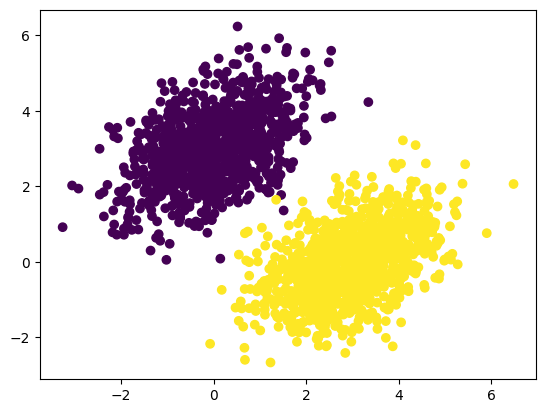

In [ ]:
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

In [ ]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

def model(input):
  return tf.matmul(inputs, W) + b

In [ ]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions,targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

In [ ]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"loss at step {step}: {loss:.4f}")

loss at step 0: 5.3629
loss at step 1: 0.6644
loss at step 2: 0.2089
loss at step 3: 0.1557
loss at step 4: 0.1414
loss at step 5: 0.1316
loss at step 6: 0.1229
loss at step 7: 0.1150
loss at step 8: 0.1077
loss at step 9: 0.1010
loss at step 10: 0.0948
loss at step 11: 0.0892
loss at step 12: 0.0839
loss at step 13: 0.0792
loss at step 14: 0.0748
loss at step 15: 0.0707
loss at step 16: 0.0670
loss at step 17: 0.0636
loss at step 18: 0.0605
loss at step 19: 0.0576
loss at step 20: 0.0550
loss at step 21: 0.0526
loss at step 22: 0.0503
loss at step 23: 0.0483
loss at step 24: 0.0464
loss at step 25: 0.0447
loss at step 26: 0.0431
loss at step 27: 0.0416
loss at step 28: 0.0403
loss at step 29: 0.0391
loss at step 30: 0.0379
loss at step 31: 0.0369
loss at step 32: 0.0359
loss at step 33: 0.0351
loss at step 34: 0.0343
loss at step 35: 0.0335
loss at step 36: 0.0328
loss at step 37: 0.0322
loss at step 38: 0.0316
loss at step 39: 0.0311


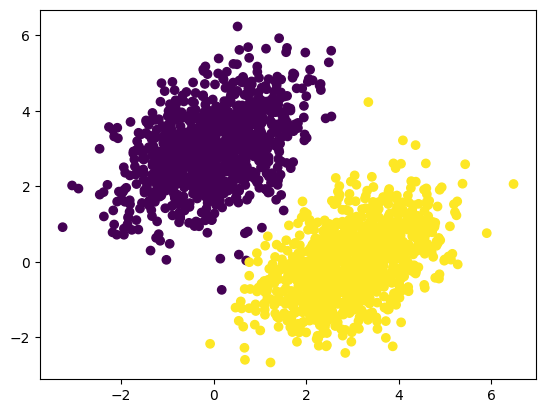

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] > 0.5)
plt.show()

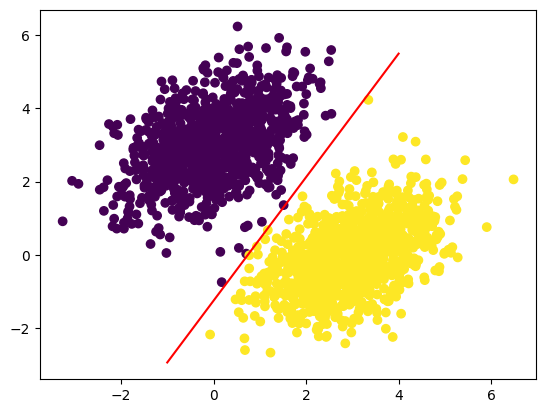

In [ ]:
x = np.linspace(-1,4,100)
y = - W[0]/ W[1] * x + (0.5 - b) / W[1]
plt.plot(x,y,"-r")
plt.scatter(inputs[:,0], inputs[:,1], c = predictions[:,0] > 0.5)

In [ ]:
class SimpleDense(keras.layers.Layer):
  def __init__(self, units, activation=None):
    super().__init__()
    self.units = units
    self.activation = activation

  def build(self, input_shape):
    input_dim = input_shape[-1]
    self.W = self.add_weight(shape = (input_dim, self.units),
                             initializer = "random_normal")
    self.b = self.add_weight(shape = (self.units,),initializer="zeros")

  def call(self, inputs):
    y = tf.matmul(inputs, self.W) + self.b
    if self.activation is not None:
      y = self.activation(y)
    return y


In [ ]:
my_dense = SimpleDense(units = 32, activation = tf.nn.relu)
input_tensor = tf.ones(shape = (2,784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer = "rmsprop", loss = "mean_squared_error", metrics =["accuracy"])

In [ ]:
history = model.fit(
    inputs,
    targets,
    epochs = 5,
    batch_size = 128
)

Epoch 1/5
16/16 [==============================] - 1s 3ms/step - loss: 14.5577 - accuracy: 0.0015
Epoch 2/5
16/16 [==============================] - 0s 3ms/step - loss: 14.1091 - accuracy: 0.0015
Epoch 3/5
16/16 [==============================] - 0s 3ms/step - loss: 13.7291 - accuracy: 0.0015
Epoch 4/5
16/16 [==============================] - 0s 4ms/step - loss: 13.3595 - accuracy: 0.0015
Epoch 5/5
16/16 [==============================] - 0s 3ms/step - loss: 12.9962 - accuracy: 0.0015


In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer = keras.optimizers.RMSprop(learning_rate = 0.1),
              loss = keras.losses.MeanSquaredError(),
              metrics = [keras.metrics.BinaryAccuracy()])
indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data = (val_inputs,val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 6ms/step - loss: 0.0836 - binary_accuracy: 0.9436 - val_loss: 0.0540 - val_binary_accuracy: 1.0000
Epoch 2/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0734 - binary_accuracy: 0.9507 - val_loss: 0.0245 - val_binary_accuracy: 1.0000
Epoch 3/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0762 - binary_accuracy: 0.9543 - val_loss: 0.0284 - val_binary_accuracy: 1.0000
Epoch 4/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0708 - binary_accuracy: 0.9629 - val_loss: 0.0795 - val_binary_accuracy: 0.9867
Epoch 5/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0774 - binary_accuracy: 0.9657 - val_loss: 0.0293 - val_binary_accuracy: 1.0000


In [ ]:
loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)

5/5 [==============================] - 0s 3ms/step - loss: 0.0293 - binary_accuracy: 1.0000


In [ ]:
predictions = model(val_inputs)
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 4ms/step
[[ 0.22717065]
 [-0.18072692]
 [ 0.02583036]
 [-0.04863575]
 [ 1.1106477 ]
 [ 0.04066357]
 [ 0.08261019]
 [-0.02674344]
 [ 0.23690912]
 [ 1.1181178 ]]
